# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = (combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"]).unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data["Mouse ID"] == duplicate_mice[0]]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != duplicate_mice[0]]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = (clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).mean()
median_tumor = (clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).median()
var_tumor = (clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).var()
std_tumor = (clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).std()
sem_tumor = (clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).sem()

tumor_by_drug_dict = {"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                      "Tumor Volume Variance":var_tumor, "Tumor Volume Std. Dev.": std_tumor, 
                      "Tumor Volume Std. Err.":sem_tumor
                      }

summary_stats = pd.DataFrame(tumor_by_drug_dict)

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = (clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).aggregate(["mean", "median", "var", "std", "sem"])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

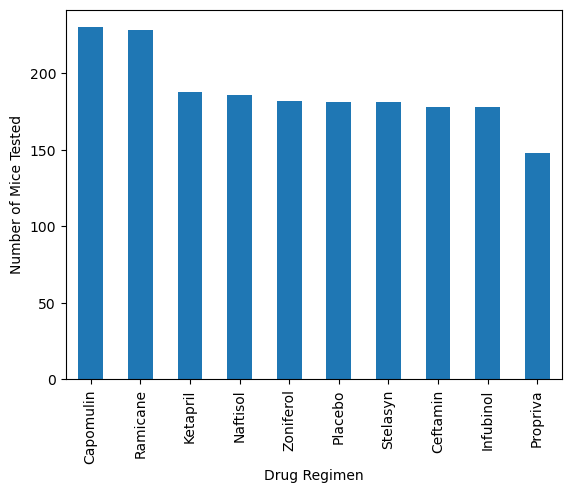

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = (clean_data.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending = False)
bar_plot.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "Number of Mice Tested")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

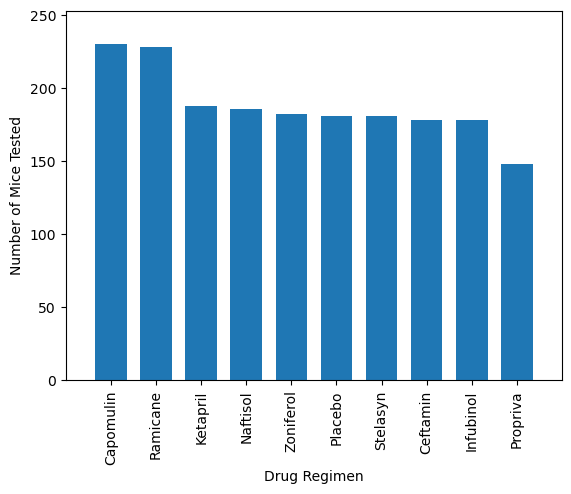

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = list(bar_plot.index)
plt.bar(x_axis, bar_plot, width = 0.7)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(bar_plot) * 1.1)
plt.xticks(label = bar_plot.index, rotation = "vertical")

<Axes: ylabel='Sex'>

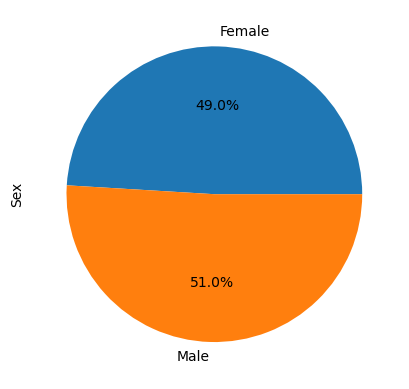

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = clean_data.groupby(["Sex"])["Sex"].count()
mice_by_sex.plot(kind = "pie", autopct = "%.1f%%")

Text(0, 0.5, 'Sex')

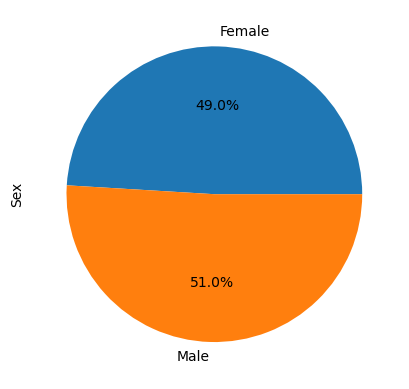

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_by_sex, labels = mice_by_sex.index, autopct = "%.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

get_max = clean_data.groupby(clean_data["Mouse ID"])["Timepoint"].max()

# Reset index
get_max = get_max.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_at_max = pd.merge(get_max, clean_data, on = ["Mouse ID", "Timepoint"])
tumor_at_max

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in drugs:
    tumor_by_drug = tumor_at_max.loc[tumor_at_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volumes.append(tumor_by_drug)
    quartiles = tumor_by_drug.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr) 
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_by_drug.loc[(tumor_by_drug > upper_bound) | (tumor_by_drug < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

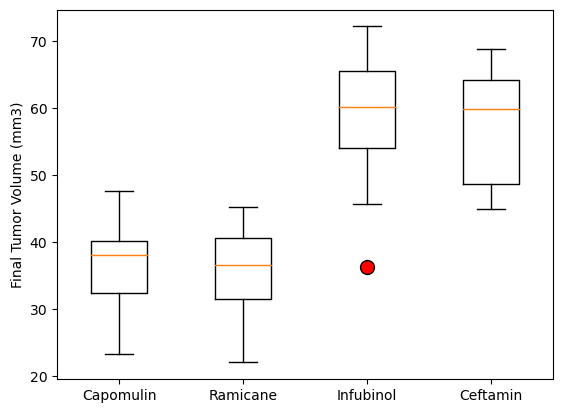

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_style = dict(markerfacecolor="red", marker='o', markersize = 10)

plt.boxplot(tumor_volumes, labels = drugs, flierprops = outlier_style)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment for l509')

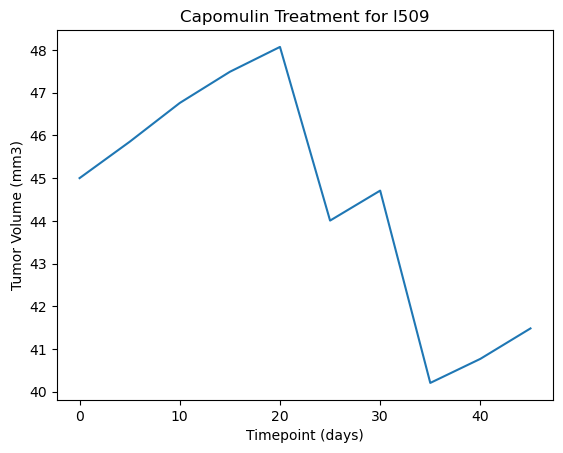

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
sliced_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
the_mouse = sliced_data["Mouse ID"].unique()[21]
x_axis = sliced_data[sliced_data["Mouse ID"] == the_mouse]["Timepoint"]
y_axis = sliced_data[sliced_data["Mouse ID"] == the_mouse]["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment for {the_mouse}")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

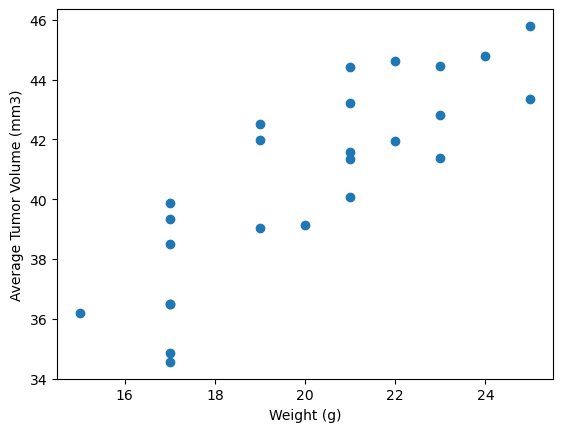

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = sliced_data.groupby(["Mouse ID"])["Weight (g)"].unique()
avg_tumor_volume = sliced_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

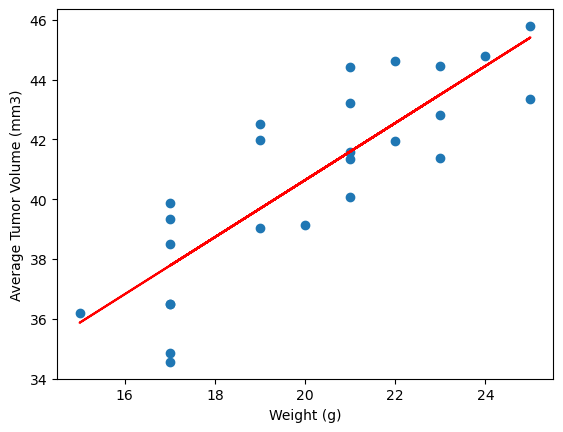

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

r = st.pearsonr(weight.astype(int), avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is{r[0]: .2f}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight.astype(int), avg_tumor_volume)
regress_values = weight * slope + intercept
line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
plt.plot(weight, regress_values, "r-")
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")